# **Import Libraries**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,  classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## **Importing datasets**


In [ ]:
# importing datasets
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [ ]:
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [ ]:
df["Heart Disease"].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

<Axes: xlabel='Heart Disease', ylabel='count'>

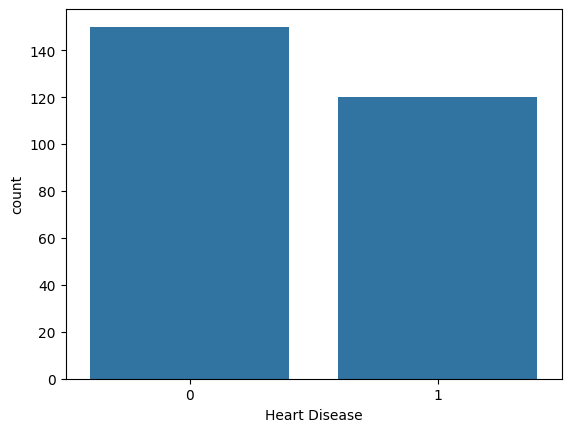

In [ ]:
sns.countplot(x="Heart Disease",data=df)

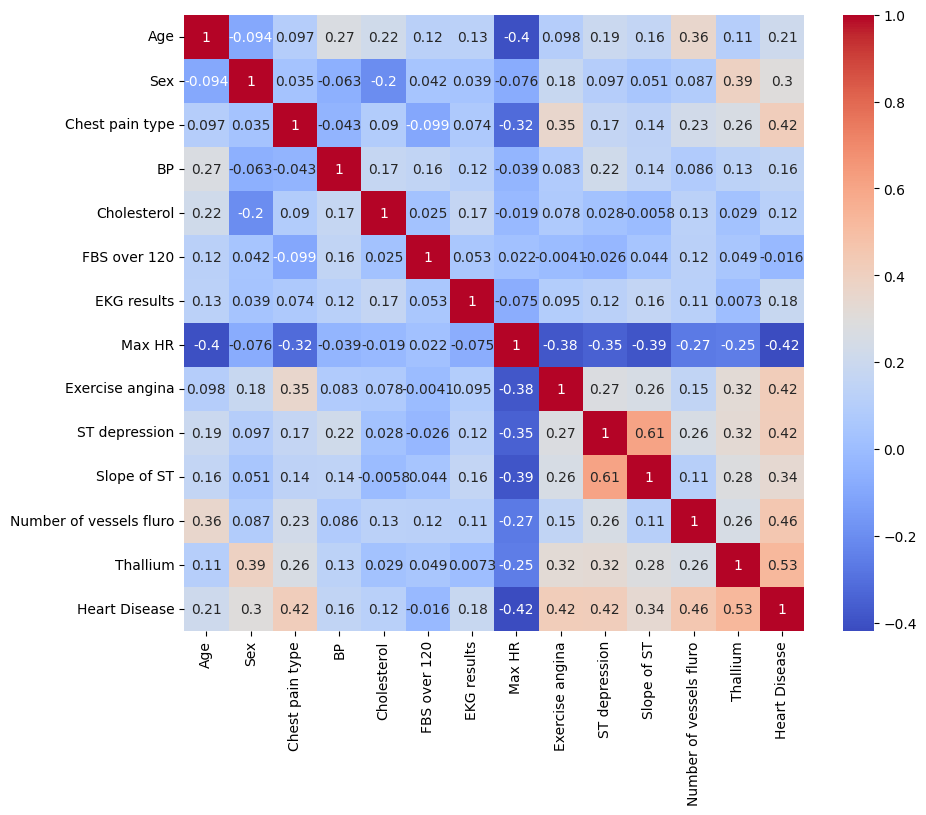

In [ ]:
correlation=df.corr()
correlation
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()



* *Spitting the dataset into x and y*

In [ ]:
x=df.iloc[:,:-1]
x

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [ ]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

* *Scaling Using MiniMaxScalar*

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.85416667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.79166667, 0.        , 0.66666667, ..., 0.5       , 0.        ,
        1.        ],
       [0.58333333, 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5625    , 0.        , 0.33333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.58333333, 1.        , 1.        , ..., 0.5       , 0.        ,
        0.75      ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ]])

* *Train test spliting*



In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn import metrics
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=1)
print("    \033[1;4mSHAPES\033[0m")
print( "\n x :",x.shape,"\n","y :",y.shape)
print("\n x_train :",x_train.shape,"\n x_test  :",x_test.shape,"\n y_train :",y_train.shape,"\n y_test  :",y_test.shape)

    SHAPES

 x : (270, 13) 
 y : (270,)

 x_train : (189, 13) 
 x_test  : (81, 13) 
 y_train : (189,) 
 y_test  : (81,)


---

# *Model Creation*


1.   KNN
2.   SVM
3.   LOGISTICS
4.   NAIVE BAYES
5.   RANDOM FOREST CLASSIFIER





---
###  1. *KNN ALGORITHM*
----




In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=1,weights="distance",algorithm="kd_tree")
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

----
### 2. *SVM ALOGRITHM*
___

In [ ]:
#from sklearn.svm import SVC
svm=SVC(kernel="linear",gamma="scale",cache_size=200,class_weight="balanced",max_iter=-1,random_state=1)

svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

---
### 3. *LOGISTICS ALGORITHM*
---

In [ ]:
#from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver="lbfgs",max_iter=1000)

logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)


---
### 4. *NAIVE BAYES*
---

In [ ]:
from sklearn.naive_bayes import GaussianNB
navie_b = GaussianNB()
navie_b.fit(x_train, y_train)
y_pred = navie_b.predict(x_test)

---
### 5. *RANDOM FOREST CLASSIFIER*
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators= 10,criterion="entropy")
forest.fit(x_train, y_train)
y_pred= forest.predict(x_test)

---

In [ ]:
models=[KNN,svm,logreg,navie_b,forest]
for i in models:
  print("*"*100,"\n"," "*15,"CLASSIFICATION_REPORT",i,"\n","*"*100)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(classification_report(y_test,y_pred))
  print("\033[1;4mCONFUSION METRICS:\033[0m")
  print(confusion_matrix(y_test,y_pred))
  print('   Mean Absolute Error  :', metrics.mean_absolute_error(y_test,y_pred))
  print('   Mean Squared Error   :', metrics.mean_squared_error(y_test,y_pred))
  print('Root Mean Squared Error :',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print("      Accuracy          :",metrics.accuracy_score(y_test, y_pred))


**************************************************************************************************** 
                 CLASSIFICATION_REPORT KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1, weights='distance') 
 ****************************************************************************************************
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        42
           1       0.71      0.69      0.70        39

    accuracy                           0.72        81
   macro avg       0.72      0.72      0.72        81
weighted avg       0.72      0.72      0.72        81

CONFUSION METRICS:
[[31 11]
 [12 27]]
   Mean Absolute Error  : 0.2839506172839506
   Mean Squared Error   : 0.2839506172839506
Root Mean Squared Error : 0.5328701692569688
      Accuracy          : 0.7160493827160493
**************************************************************************************************** 
                 CLASSIFICATION_

---